<a href="https://colab.research.google.com/github/josephib1/AI-Python/blob/main/Crop_Pest_and_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/MyDrive/AI Project/Crop Pest and Disease Detection'


In [3]:
categories = ['Tomato verticulium wilt', 'Cassava green mite', 'Cassava mosaic', 'Cashew red rust', 'Cashew gumosis',
              'Tomato healthy', 'Cassava brown spot', 'Cassava bacterial blight', 'Maize leaf beetle', 'Cassava healthy',
              'Maize leaf spot', 'Maize healthy', 'Tomato leaf blight', 'Cashew healthy', 'Cashew leaf miner',
              'Maize streak virus', 'Tomato septoria leaf spot', 'Maize leaf blight','Maize grasshoper',
              'Cashew anthracnose', 'Tomato leaf curl', 'Maize fall armyworm']

In [4]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16 ,MobileNetV2, Xception, EfficientNetV2L, DenseNet201,InceptionResNetV2
from tensorflow.keras.layers import Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
import os
from PIL import Image

# Constants
def check_image_files(dataset_path):
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for image_file in os.listdir(category_path):
                image_path = os.path.join(category_path, image_file)
                try:
                    img = tf.io.read_file(image_path)
                    img = tf.io.decode_jpeg(img)
                    #img = Image.open(image_path)
                    #img.verify()  # Check if the image is valid
                except:
                    print(f"Invalid image: {image_path}")
                    os.remove(image_path)
check_image_files(dataset_path)


Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato healthy/healthy76_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato healthy/healthy443_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato healthy/healthy77_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato healthy/healthy442_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato leaf blight/leaf blight471_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato leaf blight/leaf blight386_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato leaf blight/leaf blight558_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Detection/Tomato leaf blight/leaf blight470_.jpg
Invalid image: /content/drive/MyDrive/AI Project/Crop Pest and Disease Det

In [5]:
# Constants
IMAGE_SIZE = (192, 192)
BATCH_SIZE = 32
NUM_CLASSES = 22  # Adjust based on your dataset

In [ ]:
def preprocess_image(image, label):
    # Decode and preprocess the image
    image = tf.image.resize(image, IMAGE_SIZE)
    image /= 255.0  # Normalize pixel values to [0, 1]
    return image, label

def clean_dataset(dataset):
    # Use map to apply the preprocessing function to each image-label pair
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    return dataset


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 25124 files belonging to 22 classes.
Using 20100 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 25124 files belonging to 22 classes.
Using 5024 files for validation.


In [ ]:
train_ds = clean_dataset(train_ds)
val_ds = clean_dataset(val_ds)

In [9]:
base_model = DenseNet201(pooling='avg',classes=22,
    weights='imagenet', include_top=False, input_shape=(192, 192, 3))
for layer in base_model.layers:
    layer.trainable = False


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()


74836368/74836368 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 512)               983552    
                                                                 
 dense_1 (Dense)             (None, 22)                11286     
                                                                 
Total params: 19316822 (73.69 MB)
Trainable params: 994838 (3.80 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
629/629 [==============================] - 133s 184ms/step - loss: 0.7452 - accuracy: 0.7409 - val_loss: 0.5520 - val_accuracy: 0.8018
Epoch 2/10
629/629 [==============================] - 109s 172ms/step - loss: 0.4682 - accuracy: 0.8269 - val_loss: 0.5252 - val_accuracy: 0.8091
Epoch 3/10
629/629 [==============================] - 130s 205ms/step - loss: 0.3824 - accuracy: 0.8562 - val_loss: 0.5058 - val_accuracy: 0.8161
Epoch 4/10
629/629 [==============================] - 128s 203ms/step - loss: 0.3189 - accuracy: 0.8796 - val_loss: 0.5037 - val_accuracy: 0.8264
Epoch 5/10
629/629 [==============================] - 129s 204ms/step - loss: 0.2637 - accuracy: 0.9028 - val_loss: 0.5331 - val_accuracy: 0.8248
Epoch 6/10
629/629 [==============================] - 107s 169ms/step - loss: 0.2274 - accuracy: 0.9161 - val_loss: 0.5431 - val_accuracy: 0.8324
Epoch 7/10
629/629 [==============================] - 161s 255ms/step - loss: 0.1909 - accuracy: 0.9312 - val_loss: 0.5675 -

In [ ]:
model.save('/content/drive/MyDrive/AI Project/Models/DenseNet201.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
# Print the evaluation results
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


157/157 [==============================] - 23s 133ms/step - loss: 0.6035 - accuracy: 0.8386
Validation Loss: 0.6035450100898743
Validation Accuracy: 0.8385748267173767


Text(0.5, 0, 'Epoch')

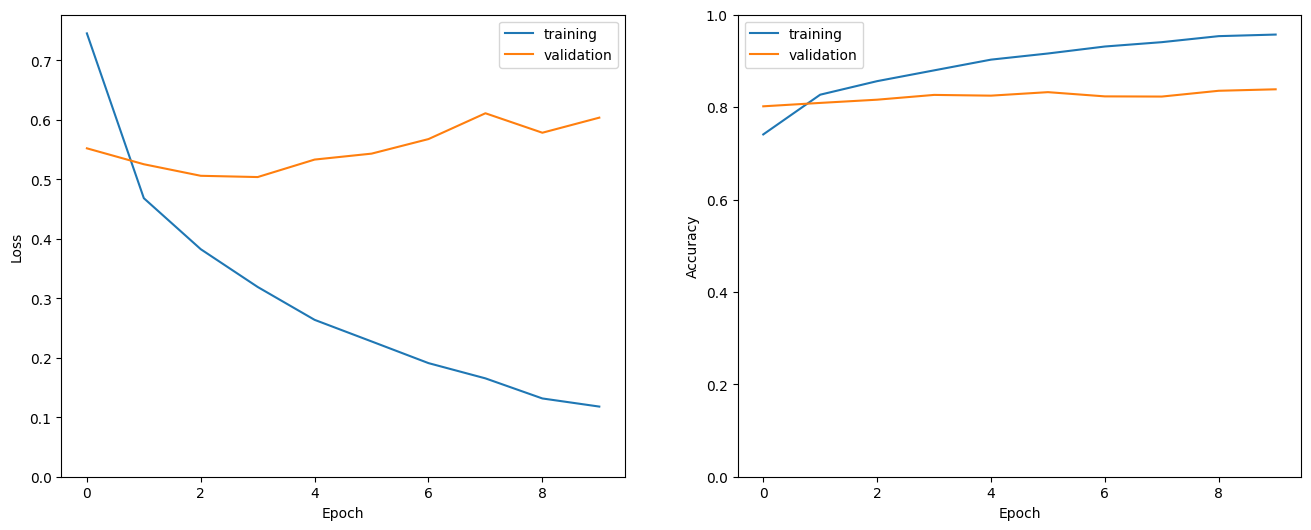

In [ ]:
metrics = history.history
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['training', 'validation'])
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['training', 'validation'])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

157/157 [==============================] - 27s 137ms/step


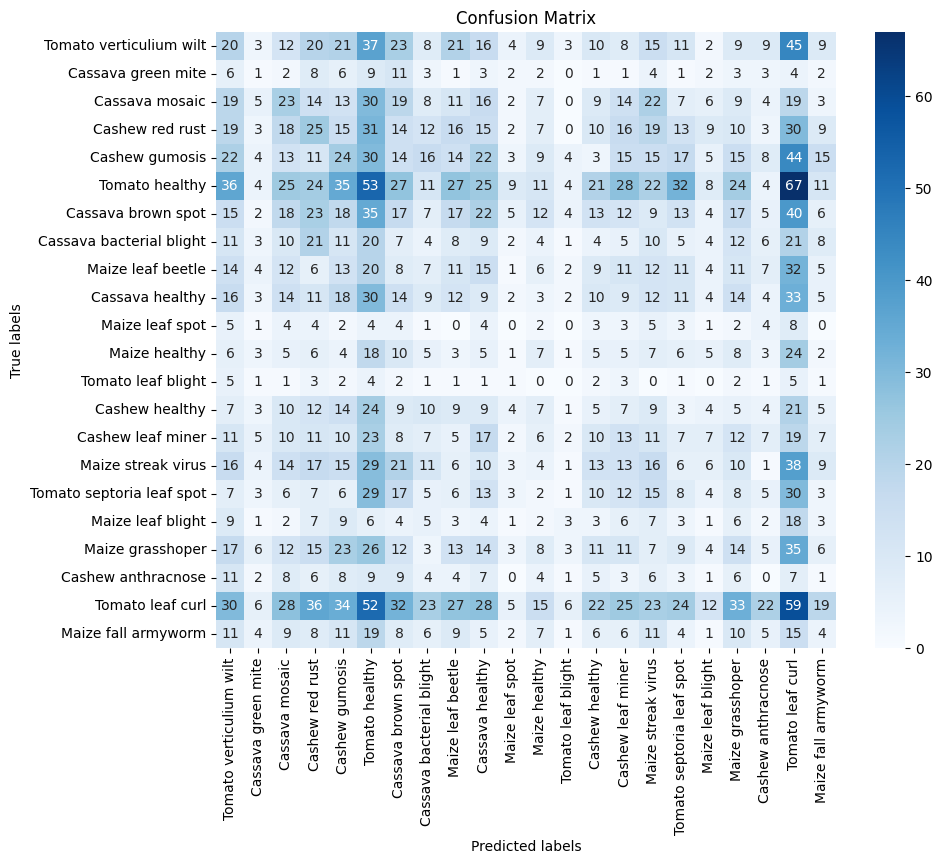

In [ ]:
# 1. Predict the classes for the validation dataset
y_pred = np.argmax(model.predict(val_ds), axis=1)

# 2. Get the true labels from the validation dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_true = np.argmax(y_true, axis=1)

# 3. Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()